# Business Analysis: CRISP-DM Methodology
* Data Source
This dataset was downloaded from Kaggle: https://www.kaggle.com/datasets/rabieelkharoua/predict-conversion-in-digital-marketing-dataset/data

## Overview
> This dataset provides a comprehensive view of customer interactions with digital marketing campaigns. It includes demographic data, marketing-specific metrics, customer engagement indicators, and historical purchase data, making it suitable for predictive modeling and analytics in the digital marketing domain.

## Objective
We aim to utilize this dataset to uncover patterns within the customer base that can inform decision-making for digital marketing budget allocation. Additionally, we will develop predictive models to determine the likelihood of a customer purchasing a product based on their interaction history and demographic information.

## Goals
1. Identify Key Patterns using K-means:

 - Analyze the dataset to identify significant patterns and trends in customer interactions and behaviors to see if we have any natural separation.
 - Understand which demographic and engagement metrics are most indicative of conversion success.
 
2. Predictive Modeling using XGBoost:

 - Develop machine learning models to predict whether a customer is likely to purchase a product.
 - Use the models to segment customers based on their likelihood to convert, enabling targeted marketing strategies.
 
3. Optimize Budget Allocation:

Utilize the insights gained from pattern recognition and predictive modeling to optimize the allocation of the digital marketing budget.
Focus resources on high-potential customer segments to maximize return on investment (ROI).


## Features

|Variable              |Description          | 
|------------------------|:-------------------| 
|CustomerID          | Unique identifier for each customer| 
|Age | Age of the customer | 
|Gender           | Gender of the customer (Male/Female)  | 
|Income  | Annual income of the customer in USD  | 
|CampaignChannel          | The channel through which the marketing campaign is delivered (Email, Social Media, SEO, PPC, Referral) | 
|CampaignType| Type of the marketing campaign (Awareness, Consideration, Conversion, Retention).|
|AdSpend| Amount spent on the marketing campaign in USD.|
|ClickThroughRate| Rate at which customers click on the marketing content.|
|ConversionRate| Rate at which clicks convert to desired actions (e.g., purchases).|
|AdvertisingPlatform| Confidential.|
|AdvertisingTool| Confidential.|
|WebsiteVisits| Number of visits to the website.|
|PagesPerVisit| Average number of pages visited per session.|
|TimeOnSite| Average time spent on the website per visit (in minutes).|
|SocialShares| Number of times the marketing content was shared on social media.|
|EmailOpens| Number of times marketing emails were opened.|
|EmailClicks| Number of times links in marketing emails were clicked.|
|PreviousPurchases| Number of previous purchases made by the customer.|
|LoyaltyPoints| Number of loyalty points accumulated by the customer.|
|--------------------Target Variable----------------|
|Conversion| Binary variable indicating whether the customer converted (1) or not (0).|

## Packages needed

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score

from collections import Counter
import warnings
warnings.filterwarnings("ignore")

## Loading the data

In [2]:
df = pd.read_csv('./digital_marketing_campaign_dataset.csv')

In [3]:
df.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


## Analising NaN and Duplicates

In [4]:
# Checking NA
df.isna().sum()

CustomerID             0
Age                    0
Gender                 0
Income                 0
CampaignChannel        0
CampaignType           0
AdSpend                0
ClickThroughRate       0
ConversionRate         0
WebsiteVisits          0
PagesPerVisit          0
TimeOnSite             0
SocialShares           0
EmailOpens             0
EmailClicks            0
PreviousPurchases      0
LoyaltyPoints          0
AdvertisingPlatform    0
AdvertisingTool        0
Conversion             0
dtype: int64

In [5]:
# Checking duplicate rows
print(f"Total duplicate rows: {df.duplicated().sum()}")

Total duplicate rows: 0


In [6]:
# number of lines int the DataFrame
num_linhas = df.shape[0]
print(f"Lines: {num_linhas}")

Lines: 8000


In [7]:
# data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

# EDA 

In [8]:
disc_variables = ["Age", "WebsiteVisits", "SocialShares", "EmailOpens", "EmailClicks", "PreviousPurchases"]
cont_variables = ["Income", "AdSpend", "ClickThroughRate", "ConversionRate", "PagesPerVisit", "TimeOnSite", "LoyaltyPoints"]
cat_variables = ["Gender", "CampaignType", "AdvertisingPlatform", "AdvertisingTool", "Conversion"]

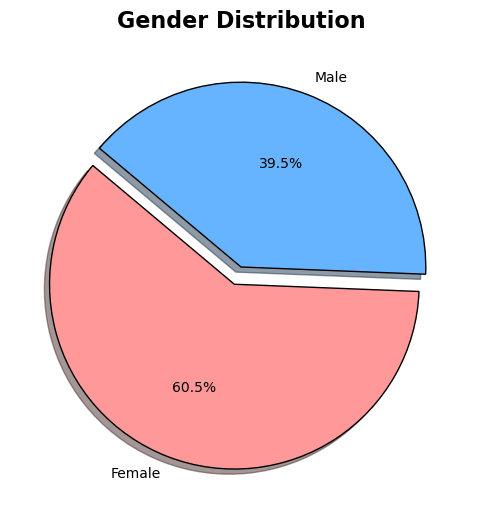

In [9]:
# Data
gender_counts = Counter(df["Gender"])
labels = gender_counts.keys()
sizes = gender_counts.values()

# Colors and explode settings
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
explode = [0.1 if i == max(sizes) else 0 for i in sizes]  # explode the largest slice

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, 
        labels=labels, 
        autopct='%.1f%%', 
        shadow=True, 
        startangle=140, 
        colors=colors, 
        explode=explode,
        wedgeprops={'edgecolor': 'black'})

# Add title
plt.title('Gender Distribution', fontsize=16, fontweight='bold')

# Show plot
plt.show()

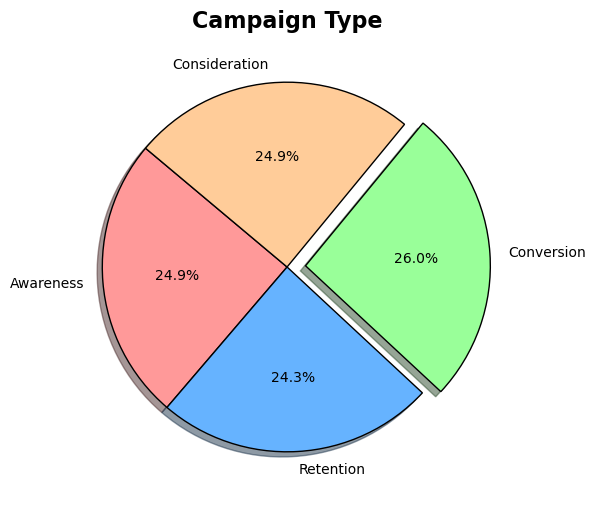

In [10]:
# Data
CampaignType_counts = Counter(df["CampaignType"])
labels = CampaignType_counts.keys()
sizes = CampaignType_counts.values()

# Colors and explode settings
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
explode = [0.1 if i == max(sizes) else 0 for i in sizes]  # explode the largest slice

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, 
        labels=labels, 
        autopct='%.1f%%', 
        shadow=True, 
        startangle=140, 
        colors=colors, 
        explode=explode,
        wedgeprops={'edgecolor': 'black'})

# Add title
plt.title('Campaign Type', fontsize=16, fontweight='bold')

# Show plot
plt.show()

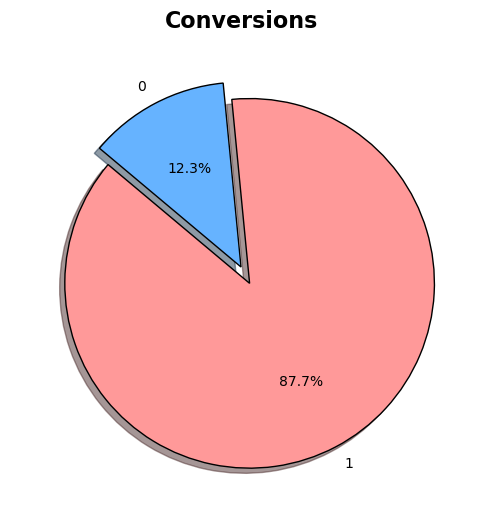

In [11]:
# Data
Conversion_counts = Counter(df["Conversion"])
labels = Conversion_counts.keys()
sizes = Conversion_counts.values()

# Colors and explode settings
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
explode = [0.1 if i == max(sizes) else 0 for i in sizes]  # explode the largest slice

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, 
        labels=labels, 
        autopct='%.1f%%', 
        shadow=True, 
        startangle=140, 
        colors=colors, 
        explode=explode,
        wedgeprops={'edgecolor': 'black'})

# Add title
plt.title('Conversions', fontsize=16, fontweight='bold')

# Show plot
plt.show()

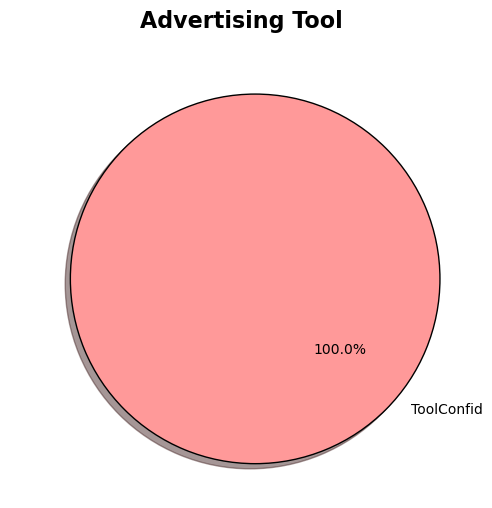

In [12]:
# Data
AdvertisingTool_counts = Counter(df["AdvertisingTool"])
labels = AdvertisingTool_counts.keys()
sizes = AdvertisingTool_counts.values()

# Colors and explode settings
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
explode = [0.1 if i == max(sizes) else 0 for i in sizes]  # explode the largest slice

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, 
        labels=labels, 
        autopct='%.1f%%', 
        shadow=True, 
        startangle=140, 
        colors=colors, 
        explode=explode,
        wedgeprops={'edgecolor': 'black'})

# Add title
plt.title('Advertising Tool', fontsize=16, fontweight='bold')

# Show plot
plt.show()

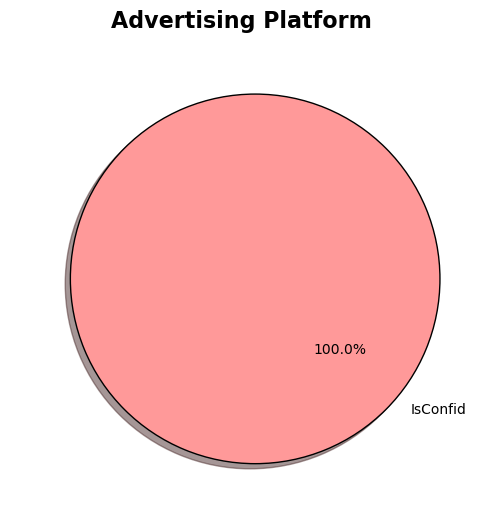

In [13]:
# Data
AdvertisingPlatform_counts = Counter(df["AdvertisingPlatform"])
labels = AdvertisingPlatform_counts.keys()
sizes = AdvertisingPlatform_counts.values()

# Colors and explode settings
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
explode = [0.1 if i == max(sizes) else 0 for i in sizes]  # explode the largest slice

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, 
        labels=labels, 
        autopct='%.1f%%', 
        shadow=True, 
        startangle=140, 
        colors=colors, 
        explode=explode,
        wedgeprops={'edgecolor': 'black'})

# Add title
plt.title('Advertising Platform', fontsize=16, fontweight='bold')

# Show plot
plt.show()

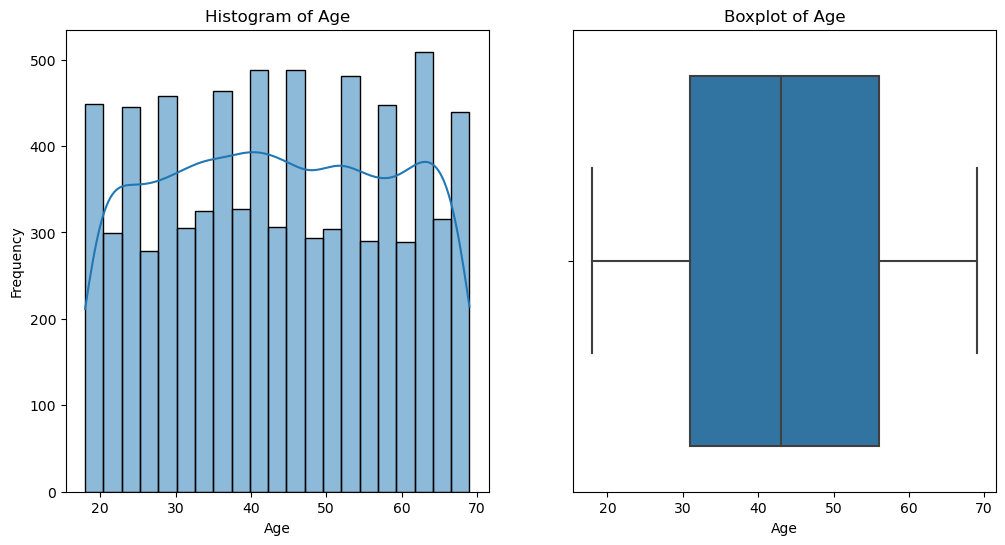

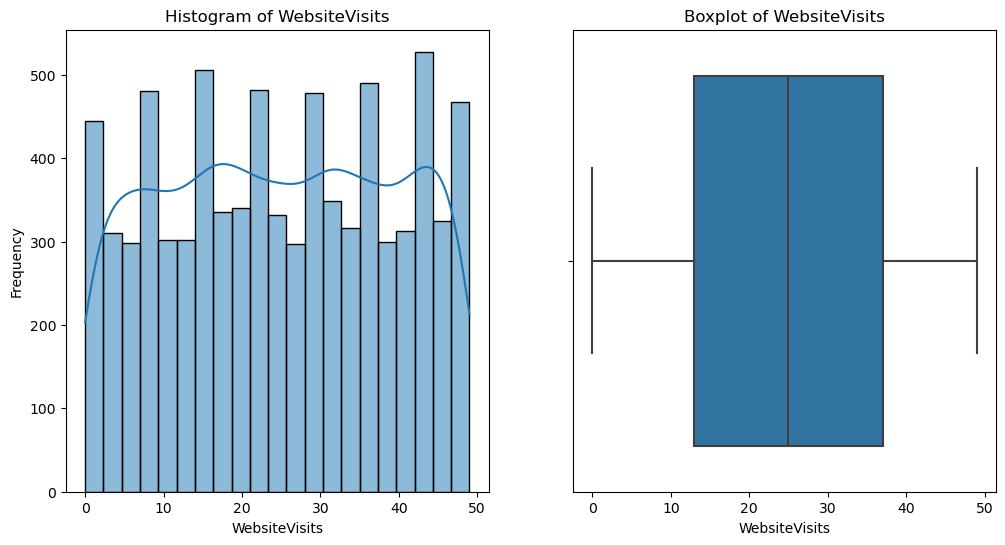

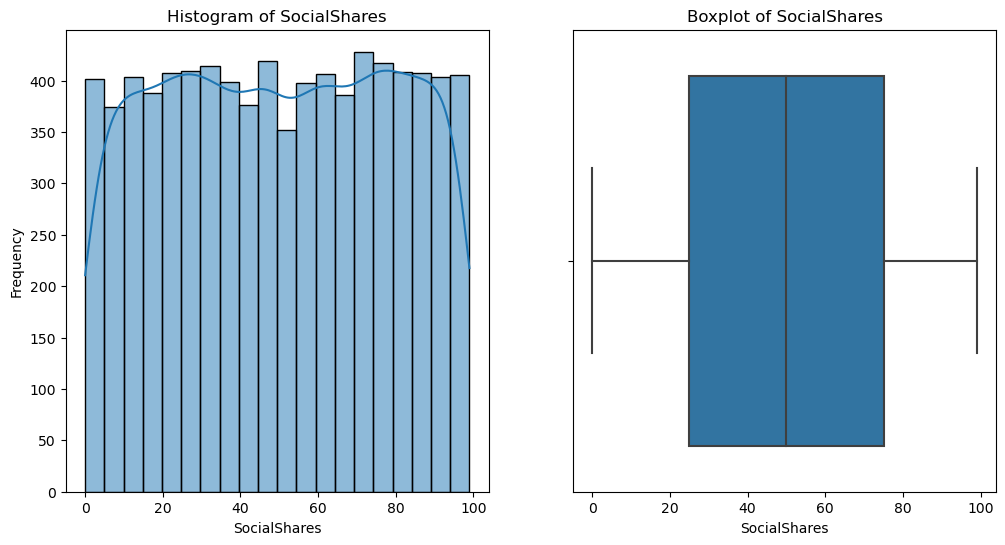

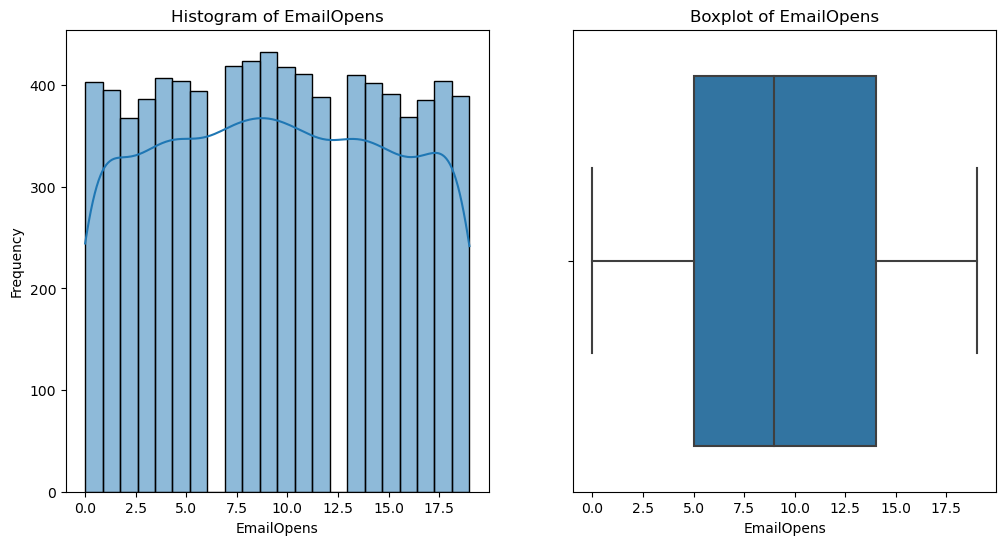

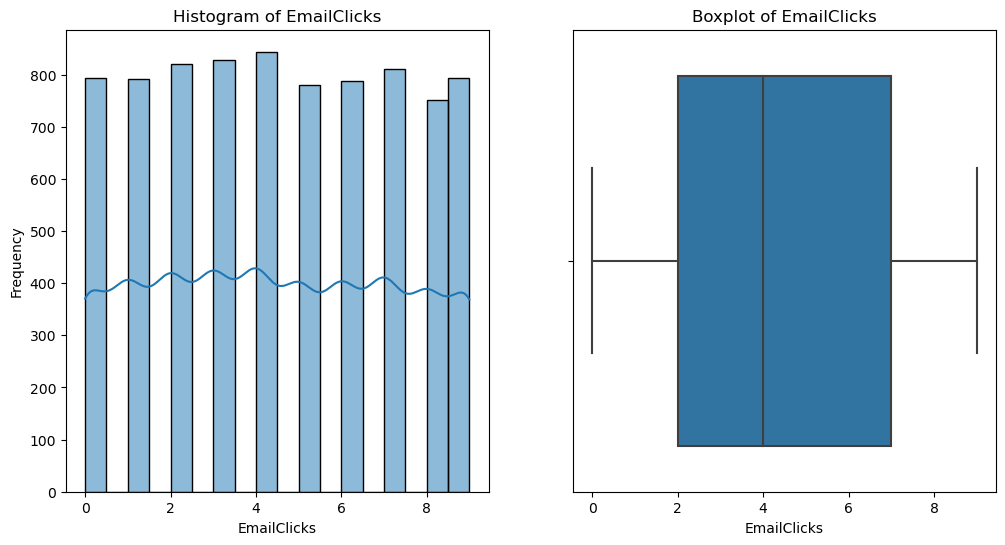

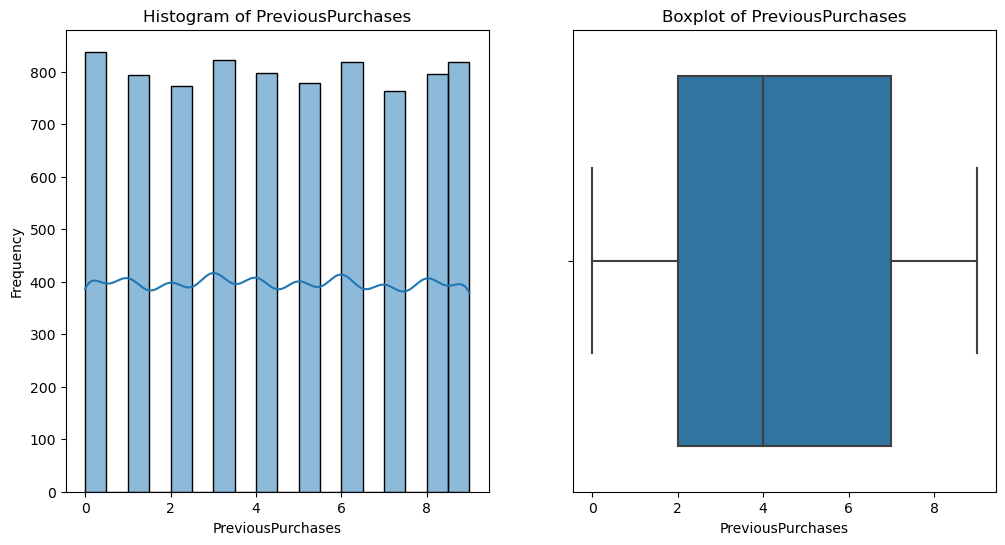

In [14]:
# Discrete variables analisys 


for col in disc_variables:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    
    plt.show()


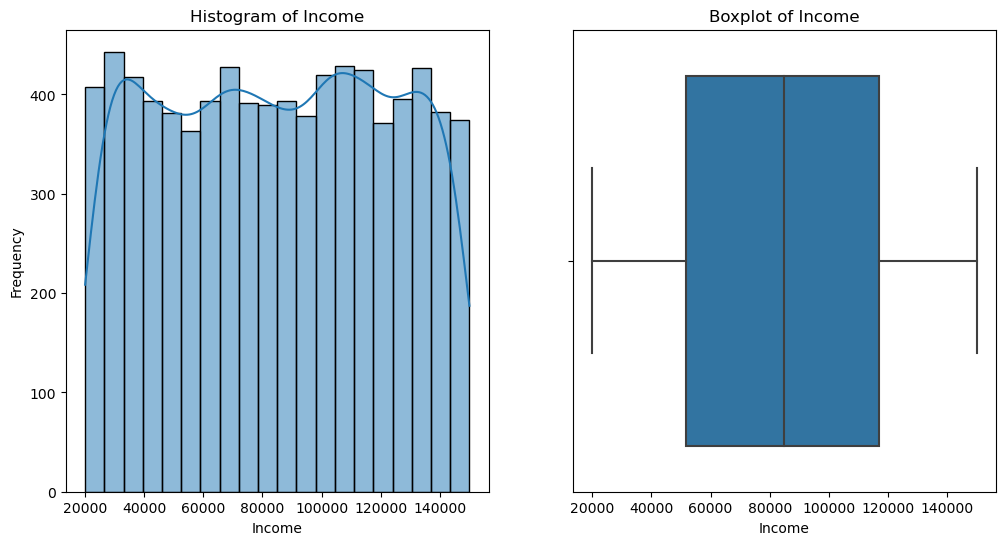

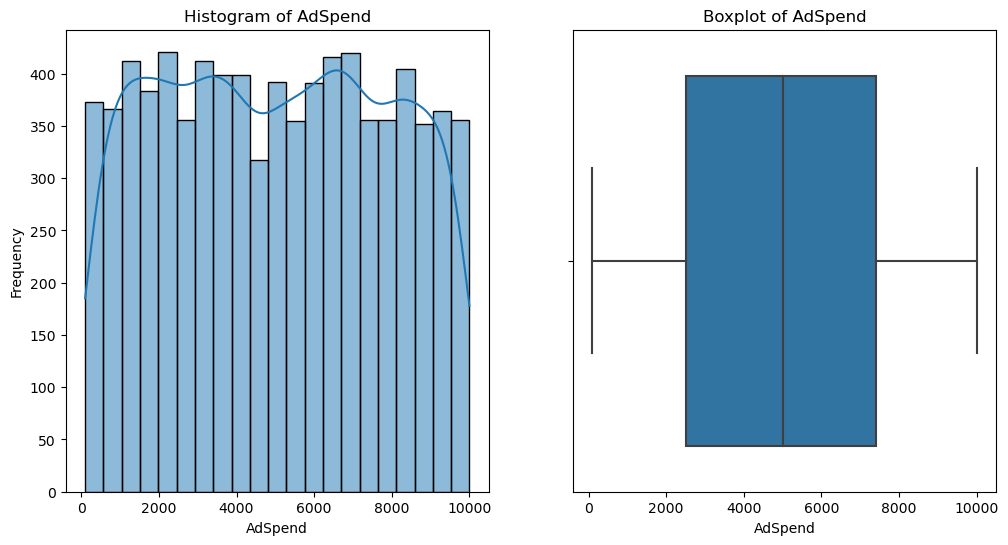

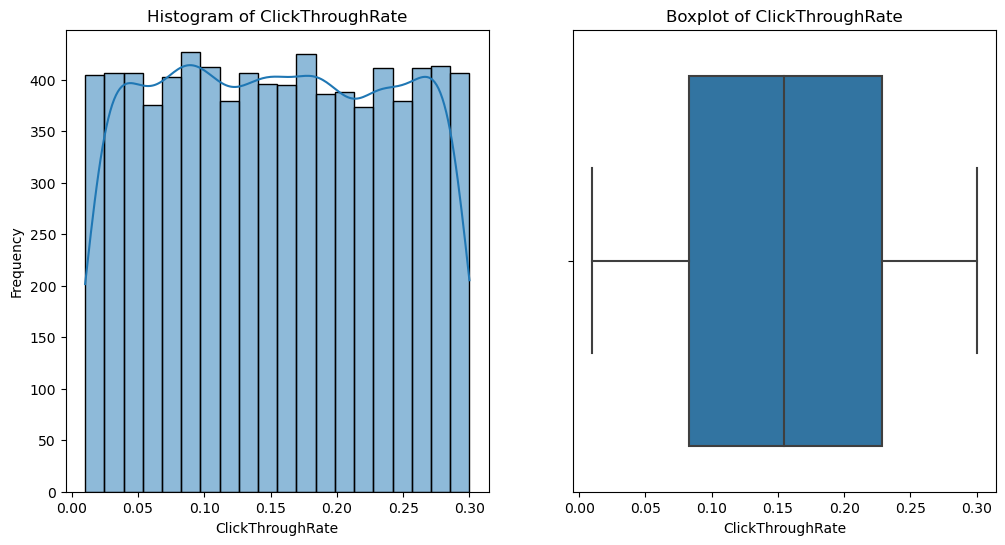

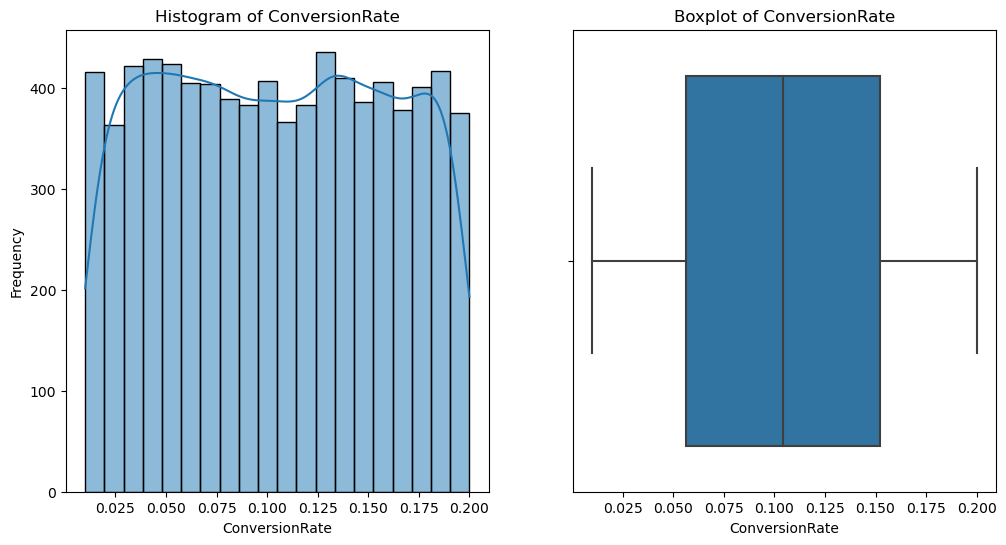

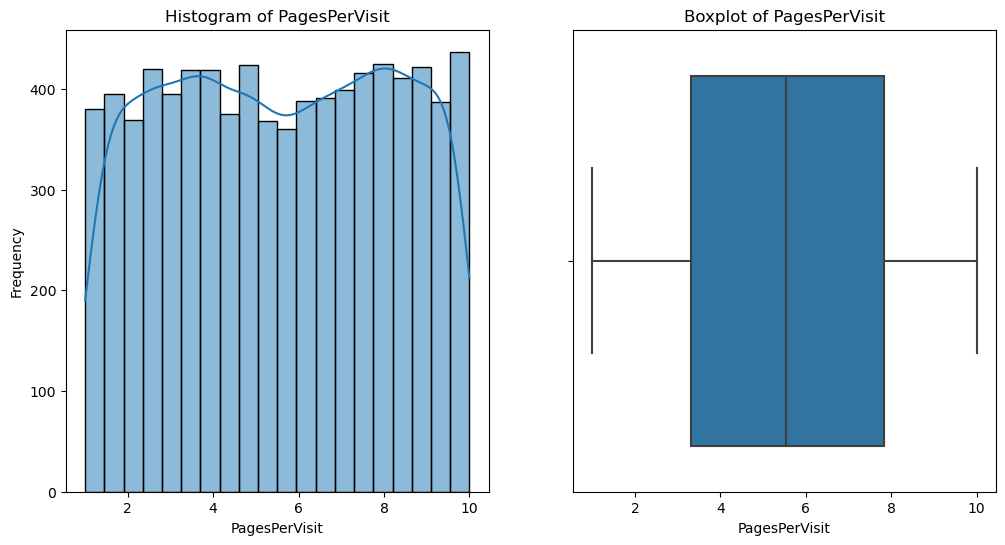

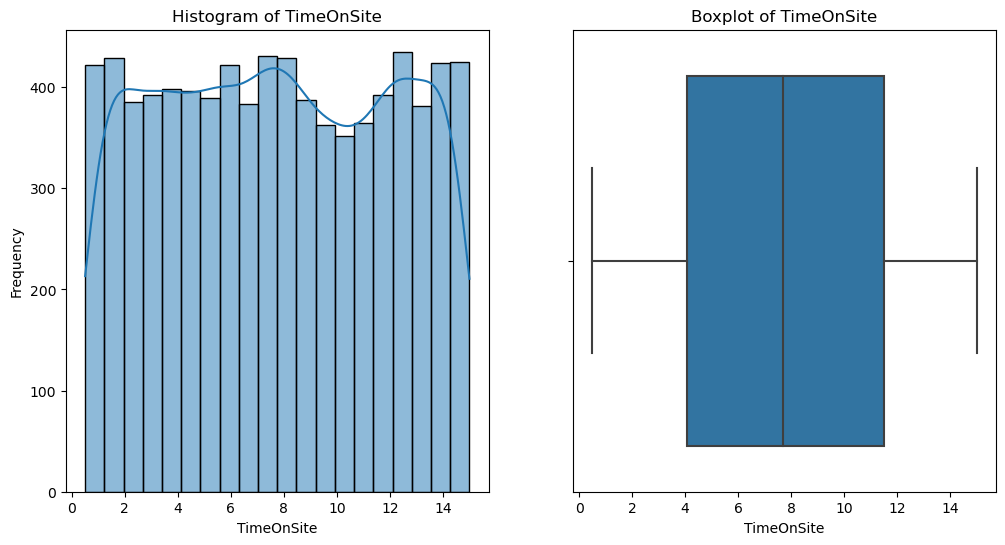

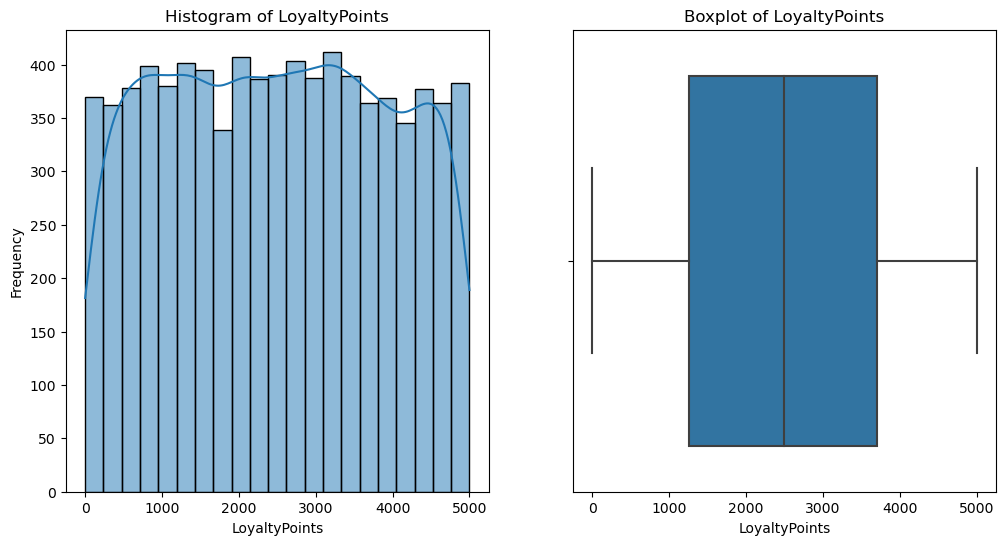

In [15]:
# continuos variables analisys 


for col in cont_variables:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    
    plt.show()

<br>
<br>
<br>
By the data analysis, we can see that the features are well distributed and we have a slightly unbalanced dataset for the conversion, our target. <br>
<br>
<br>
We can also see that advertising tool and platform will not bring much to our modeling.
<br>
<br>
<br>



In [16]:
df = df.drop(columns = ['AdvertisingTool', 'AdvertisingPlatform','CustomerID'])

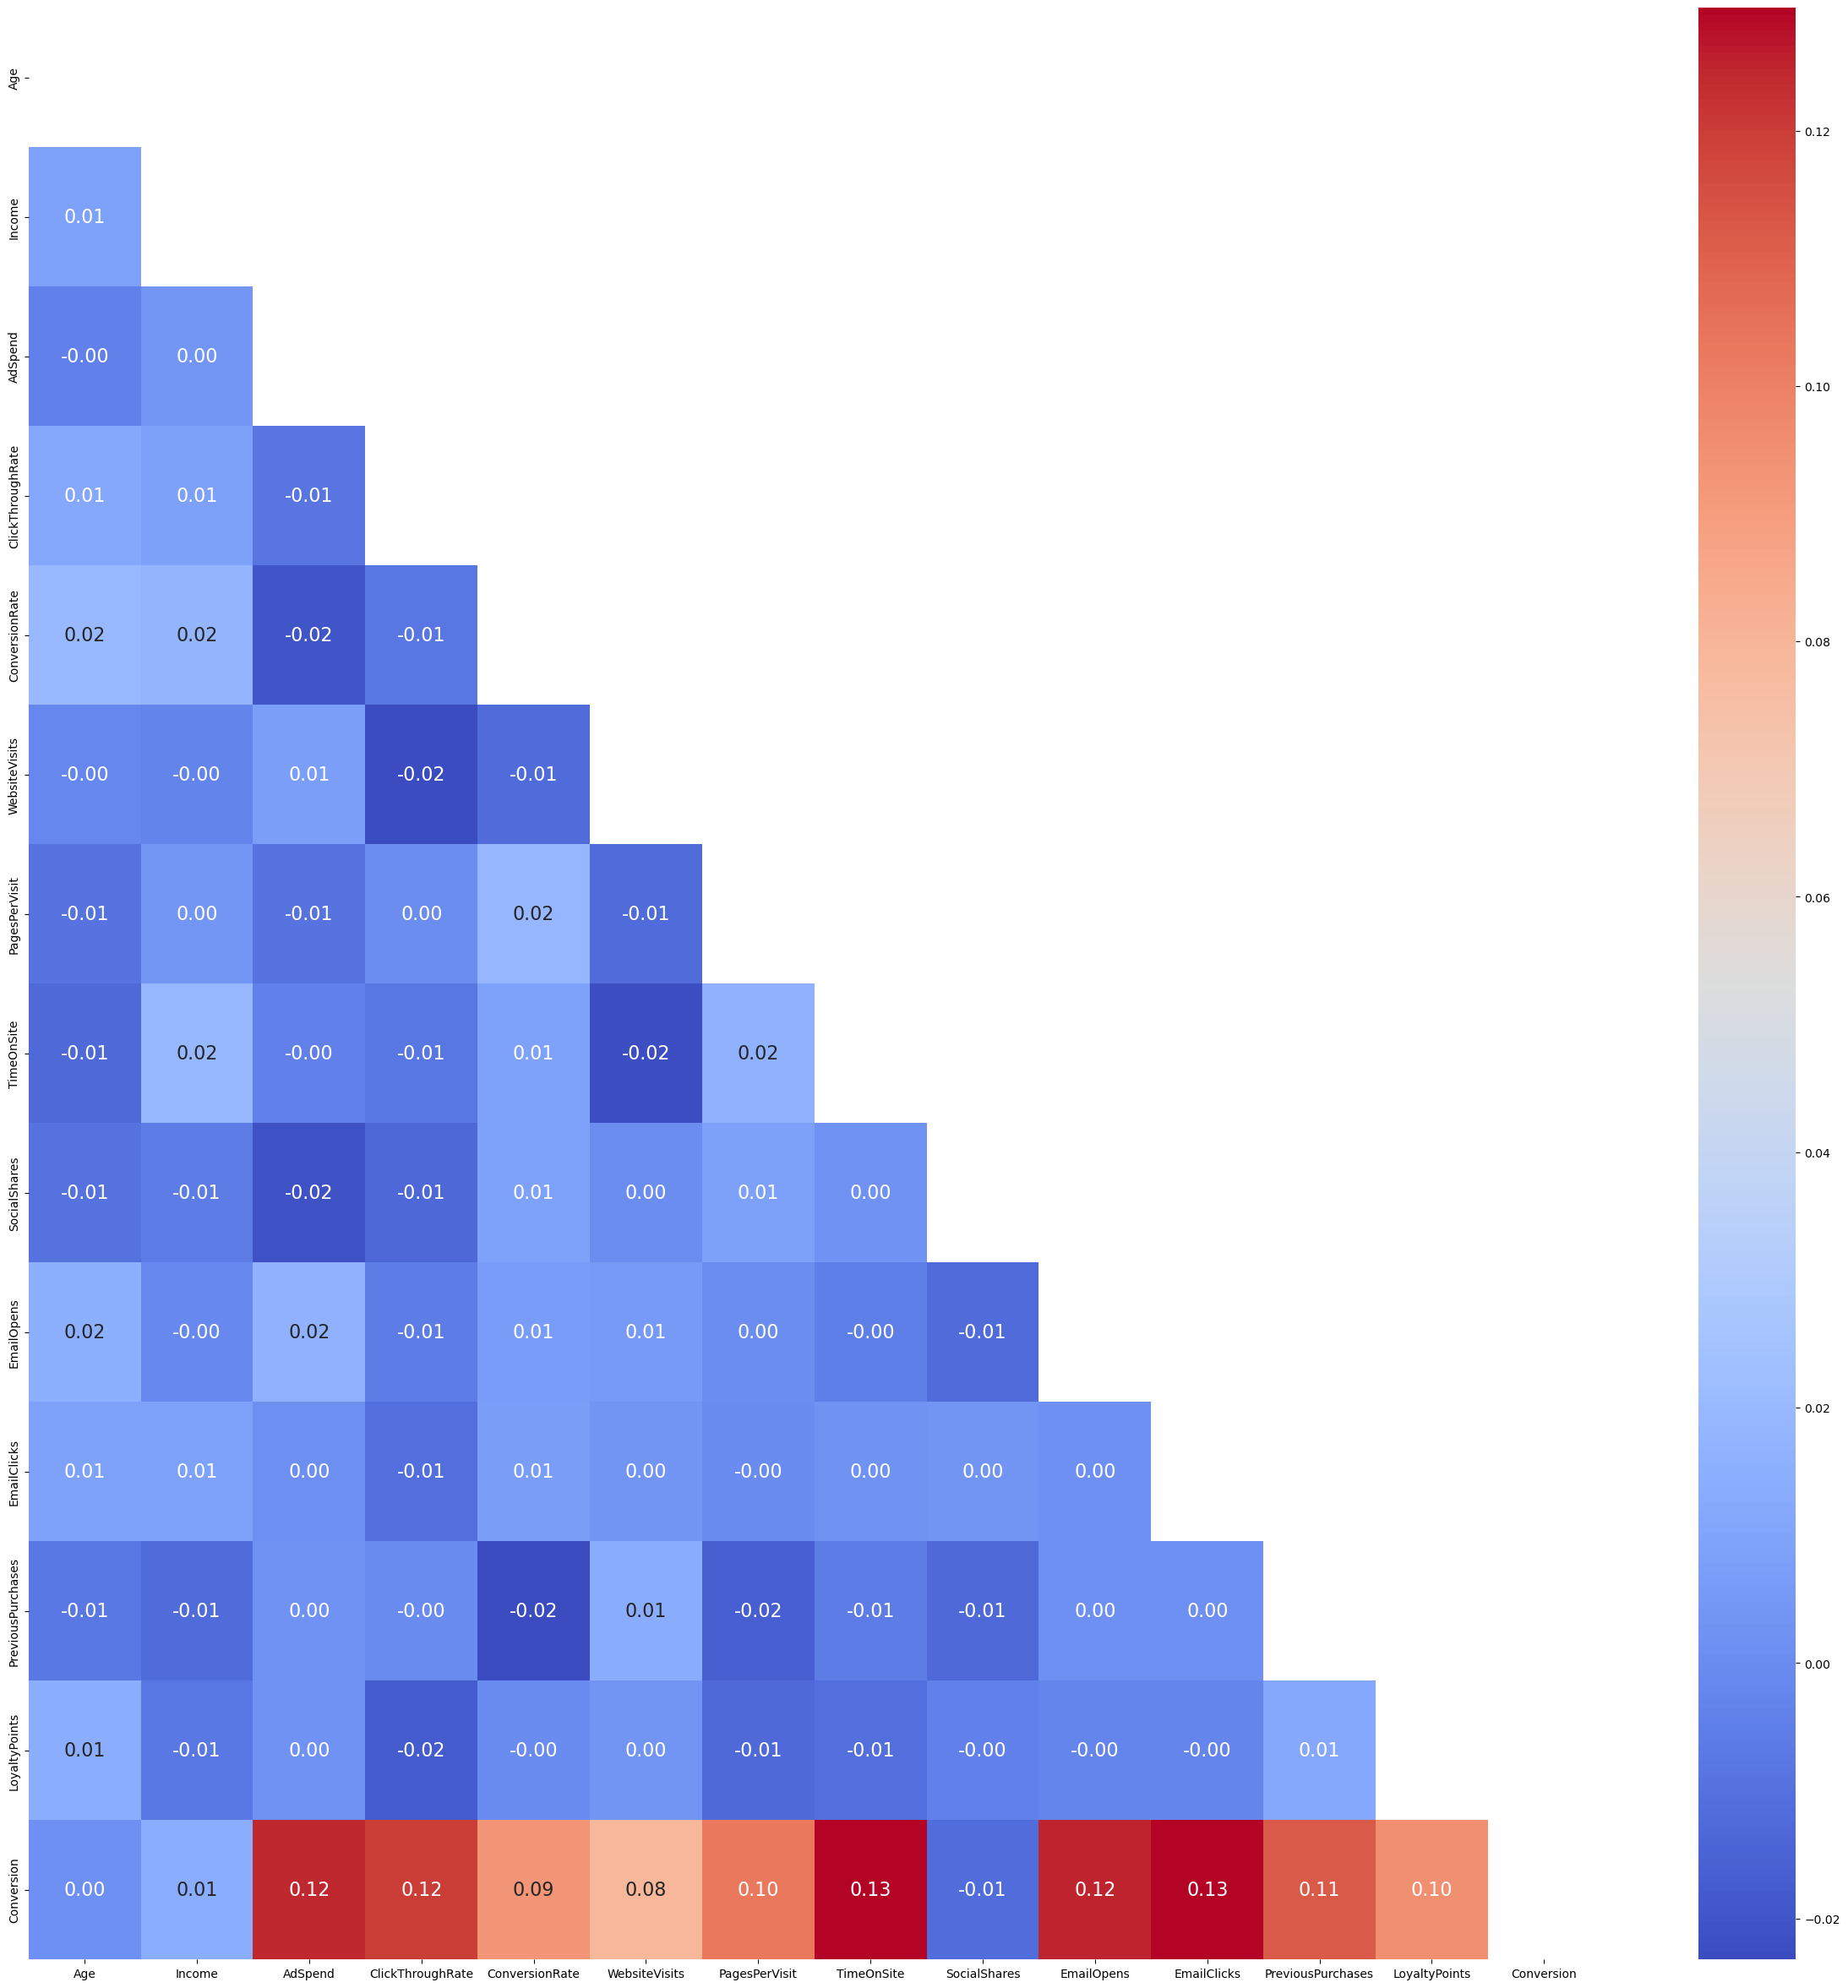

In [17]:
plt.figure(figsize=(30, 30))
corr = df.corr()

# Mask the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Adjust the heatmap to display only the lower triangle
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', annot_kws={"size": 16}, fmt='.2f')
plt.show()

# Data preparation

* selection: Do we have all the data selected?
* construction: build new variables
* integration: in the case of, multiple data sources we need to integrate them
* formating: format the data to the correct format.

In [18]:
# Separate features and target
X = df.drop('Conversion', axis=1)
y = df['Conversion']

In [19]:
# Define preprocessing steps for numerical and categorical features
numerical_features = ['Age', 'WebsiteVisits', 'SocialShares', 'EmailOpens', 'EmailClicks', 'PreviousPurchases', 
                      'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate', 'PagesPerVisit', 'TimeOnSite', 'LoyaltyPoints']
categorical_features = ['Gender', 'CampaignType']

# Numerical features: Impute missing values with median and scale to zero mean and unit variance

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical features: Impute missing values with the most frequent value and apply one-hot encoding

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps into a single preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit and transform the data
X_preprocessed = preprocessor.fit_transform(X)

# Extract column names for the transformed data
num_cols = numerical_features
cat_cols = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
all_cols = num_cols + list(cat_cols)

# Create a DataFrame with the new column names
X_pad = pd.DataFrame(X_preprocessed, columns=all_cols)

X_pad.head()

,Age,WebsiteVisits,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,Income,AdSpend,ClickThroughRate,ConversionRate,PagesPerVisit,TimeOnSite,LoyaltyPoints,Gender_Female,Gender_Male,CampaignType_Awareness,CampaignType_Consideration,CampaignType_Conversion,CampaignType_Retention
0,0.830400,-1.729507,-1.065759,-0.608829,1.586840,-0.168115,1.390381,0.527484,-1.320328,-0.298084,-1.208303,-0.078268,-1.260823,1.0,0.0,1.0,0.0,0.0,0.0
1,1.702775,1.205221,-1.550199,-1.309262,0.886654,-0.860656,-1.141736,-0.388418,0.010671,1.427538,-1.009576,-0.561778,0.677701,0.0,1.0,0.0,0.0,0.0,1.0
2,0.159343,-1.589758,-1.723213,0.266712,-0.863810,1.216969,0.100905,-1.217296,1.460225,-0.509632,1.025746,1.435016,-0.107223,1.0,0.0,1.0,0.0,0.0,0.0
3,-0.780138,1.554594,1.356440,-1.309262,-0.863810,-1.553198,-1.079865,-1.572106,-0.204964,-0.298580,-0.386761,1.646339,-0.019076,1.0,0.0,0.0,0.0,1.0,0.0
4,1.098823,-1.729507,-1.515596,-0.608829,0.536561,1.216969,-0.018633,-1.170918,1.166907,0.101164,-1.343379,1.481958,1.297525,1.0,0.0,0.0,0.0,1.0,0.0


### We need to search for the best number of cluster for K-mean, we will use 2 methods for this.

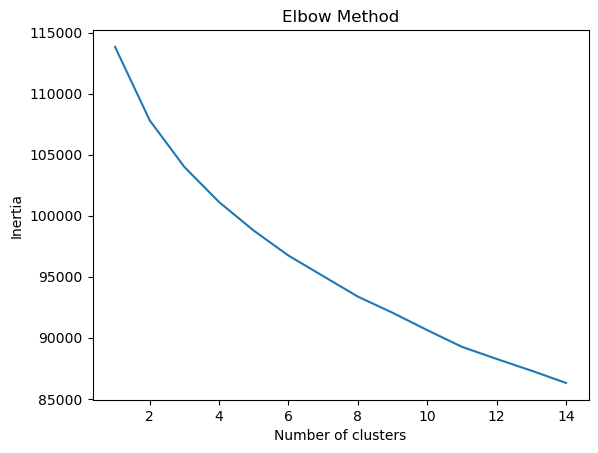

In [20]:
# Determine optimal number of clusters using the elbow method
inertia = []
for n in range(1, 15):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_preprocessed)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 15), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()



### We could not determine a perfect cluster amount by this metodology.

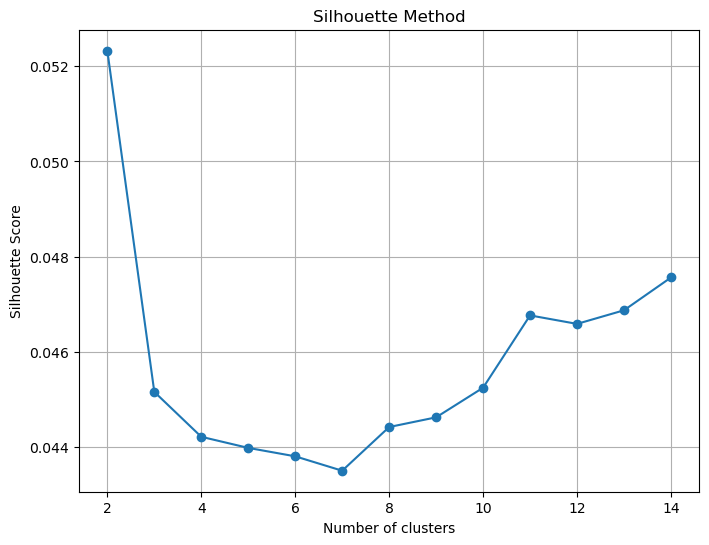

In [21]:
# Silhouette Method
silhouette_scores = []
for n in range(2, 15):
    kmeans = KMeans(n_clusters=n, random_state=42)
    cluster_labels = kmeans.fit_predict(X_preprocessed)
    silhouette_avg = silhouette_score(X_preprocessed, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 15), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.grid(True)
plt.show()

### With this one we can use 2 clusters os 14 or more, 14 clusters are too much for such analysis, so we will try to use 2 then.

# Modeling K mean

In [22]:
# Fit K-Means with the optimal number of clusters
optimal_clusters = 2  # Example: determine from the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(X_preprocessed)

# Add cluster labels to the original dataframe
df['Cluster'] = clusters

In [23]:
# Perform PCA
pca = PCA(n_components=2)
X_pad_t = pca.fit_transform(X_pad)

In [24]:
df_pca = pd.DataFrame(data=X_pad_t, columns=['PC1', 'PC2'])
df_pca['Cluster'] = clusters

In [25]:
def biplot(score,coeff, y, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 2/(xs.max() - xs.min())
    scaley = 2/(ys.max() - ys.min())
    
    fig, ax = plt.subplots(figsize=(10, 10))
#    scatter = ax.scatter(xs * scalex,ys * scaley, c = y)
    sns.kdeplot(x = xs * scalex, y = ys * scaley, hue=y, ax=ax, fill=True, alpha=.6, palette='viridis')
#    ax.legend(*scatter.legend_elements())
    
    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5, 
                 length_includes_head=True, head_width=0.04, head_length=0.04)
        if labels is None:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'k', ha = 'center', va = 'center')
    ax.set_xlim(-1.2,1.2)
    ax.set_ylim(-1.2,1.2)
    ax.set_xlabel("PC{0}, {1:.1%} explained variace ratio".format(1, pca.explained_variance_ratio_[0]))
    ax.set_ylabel("PC{0}, {1:.1%} explained variace".format(1, pca.explained_variance_ratio_[1]))
    ax.grid()


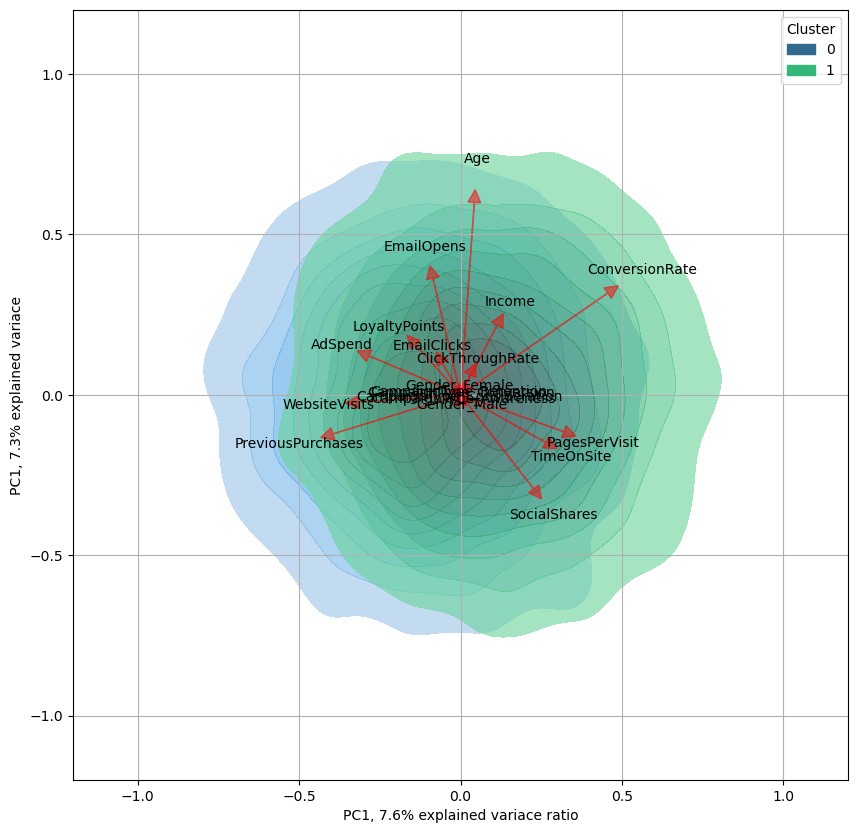

In [26]:
# Plot the biplot
biplot(X_pad_t, np.transpose(pca.components_),df_pca['Cluster'], labels=X_pad.columns)

### Feature Importance:

 - Email Clicks, Conversion Rate, Income, Pages Per Visit, and TimeOnSite are crucial for PC1. Customers with higher values in these features are likely contributing to higher engagement and conversion metrics.
 
 
- Previous Purchases, Website Visits, and Loyalty Points are important for distinguishing customers in Cluster 0, suggesting these features are key differentiators for this group.

### Cluster-Specific Analysis:

Cluster 0:
- Higher Previous Purchases and Website Visits indicate these customers have engaged more with the product historically.
- High Loyalty Points suggest a potential focus on loyalty programs and rewards.
- The absence of a high Conversion Rate in this cluster might indicate that these customers are not frequent purchasers, potentially due to the product being a high-value item or requiring a longer decision-making process.

Cluster 1:
- Higher values in Email Clicks, Conversion Rate, Income, Pages Per Visit, and TimeOnSite suggest this cluster consists of more actively engaged customers with a higher likelihood of conversion.

### Marketing Strategy:

* Focus on Cluster 0:

Objective: Increase conversion rates by leveraging existing engagement metrics.

Tactics:

- Targeted Campaigns: Design personalized marketing campaigns aimed at converting high website visitors and those with high loyalty points. Emphasize exclusive offers or loyalty point redemptions to drive purchases.
- Engagement Strategies: Use email marketing and reminders for customers with high email open and click rates to encourage conversions.
- Behavioral Analysis: Conduct deeper behavioral analysis to understand why customers in this cluster, despite high engagement metrics, are not converting. This could involve surveys, focus groups, or further segmentation.

* Utilize Insights from Cluster 1:

- Objective: Maintain and enhance engagement.

Tactics:

- Reward High Converters: Implement loyalty programs or rewards for frequent purchasers to maintain high engagement levels.
- Upsell/Cross-sell: Use the high engagement metrics to introduce related products or services, leveraging the high income and time spent on the site.

# XGboost - Modeling if the  campaign will convert or not

In [27]:
# To avoid data leakage we will Split the data into training and testing sets before re applaying the processor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [28]:

# Train XGBoost classifier
model = xgb.XGBClassifier(random_state=42, n_estimators = 350)
model.fit(X_train_preprocessed, y_train)

# Make predictions
y_pred = model.predict(X_test_preprocessed)

# Evaluate model
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Feature importance
importances = model.feature_importances_
feature_names = preprocessor.get_feature_names_out()
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print(feature_importances)

Accuracy: 0.918125
              precision    recall  f1-score   support

           0       0.78      0.45      0.57       194
           1       0.93      0.98      0.95      1406

    accuracy                           0.92      1600
   macro avg       0.86      0.72      0.76      1600
weighted avg       0.91      0.92      0.91      1600

cat__CampaignType_Conversion       0.111491
num__PreviousPurchases             0.076279
num__EmailClicks                   0.075425
num__EmailOpens                    0.071354
num__ClickThroughRate              0.063318
num__PagesPerVisit                 0.059957
num__TimeOnSite                    0.059722
num__AdSpend                       0.058127
num__ConversionRate                0.056792
num__WebsiteVisits                 0.056625
num__LoyaltyPoints                 0.054223
cat__CampaignType_Awareness        0.044169
cat__CampaignType_Consideration    0.040797
num__Income                        0.038408
num__Age                           0.0

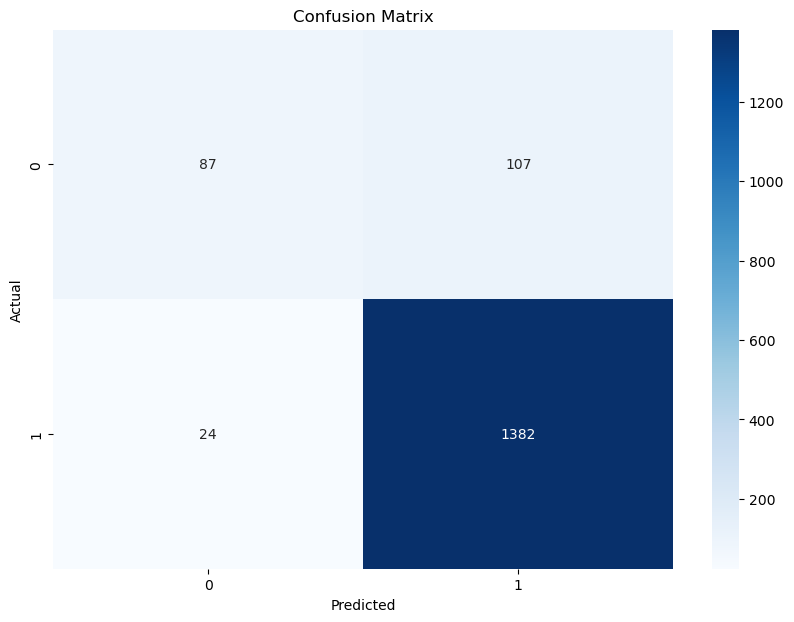

In [29]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=model.classes_, columns=model.classes_)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model evaluation

The XGBoost model demonstrates strong performance in predicting whether a customer will respond to a campaign, with an overall accuracy of **91.81%**. Key performance metrics include:

- Precision: 0.78 for non-responders (class 0) and 0.93 for responders (class 1).
- Recall: 0.45 for non-responders and 0.98 for responders.
- F1-Score: 0.57 for non-responders and 0.95 for responders.
This indicates that the model is particularly effective at **identifying responders, with high precision and recall rates.

**Conclusion Based on Model Predictions:<br>
The model can accurately predict if a customer will respond to a campaign. Before launching a new campaign, we can use the model to predict the likely response of target customers, enabling us to anticipate the campaign's performance and make data-driven decisions to optimize marketing efforts.**

## Feature Importance Analysis

The feature importance values from the XGBoost model provide additional insights into which factors most influence the prediction of customer responses. Key observations include:

Top Influential Features:

- Campaign Type - Conversion: The type of campaign focused on conversion has the highest importance score, indicating that the nature of the campaign itself plays a critical role in predicting customer response.
- Previous Purchases: Customers' historical purchase behavior is a strong predictor of future responses.
- Email Clicks and Opens: Email engagement metrics are also highly influential, showing the importance of customer interaction with email marketing efforts.

Other Notable Features:

- Click Through Rate and Pages Per Visit: These engagement metrics indicate that higher interaction with digital content correlates with higher campaign response rates.
- Ad Spend: Investment in advertising impacts customer response, suggesting that higher ad spend can lead to higher engagement.
- Time on Site: The amount of time customers spend on the website is also a significant predictor, reflecting their level of interest and engagement.

Demographic and Other Factors:

- Income and Age: Demographic factors like income and age, although not the top predictors, still play a role in customer response.
- Gender: Gender appears to have minimal importance in this model, suggesting that other factors are more influential in determining campaign response.